<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_5_2_image_conv_with_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=torchvision.transforms.PILToTensor())

train_dataloader = DataLoader(
    train_data_transformed, batch_size=1)

torch.uint8
torch.Size([28, 28])
tensor([[  0,   0,   0,   0, 183, 225],
        [  0,   0,   0,   0, 193, 228],
        [  1,   3,   0,  12, 219, 220],
        [  0,   6,   0,  99, 244, 222],
        [  4,   0,   0,  55, 236, 228],
        [  0,   0,   0, 237, 226, 217]], dtype=torch.uint8)


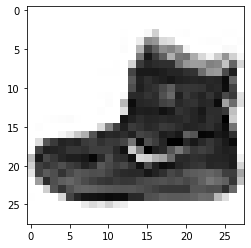

In [ ]:
img, _ = next(iter(train_dataloader))
img    = torch.squeeze(img)
print(img.dtype, img.size(), sep='\n')
print(img[9:15, 9:15])
plt.imshow(img, cmap='Greys');

In [ ]:
kern = torch.tensor([[1/16, 1/8, 1/16],
                   [1/8, 1/4, 1/8],
                   [1/16, 1/8, 1/16]])

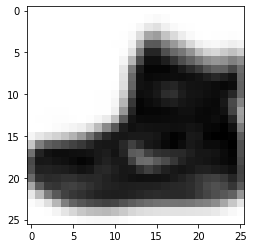

In [ ]:
output=torch.empty(26,26)
for i in range(26):
  for j in range(26):
    sub_img = img[i:i+3, j:j+3]
    output[i, j] = (sub_img * kern).sum()
plt.imshow(output, cmap='Greys');

torch.Size([28, 27])


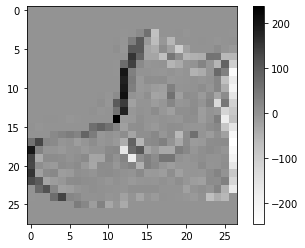

In [ ]:
kern   = torch.tensor([-1,1])
output = torch.empty(28, 27)
for i in range(28):
  for j in range(27):
    sub_img = img[i, j:j+2]
    output[i,j] = (sub_img * kern).sum()
print(output.size())
plt.imshow(output,cmap='Greys');
plt.colorbar();